<a href="https://colab.research.google.com/github/alanoud1988/Alanoud-Alqubaysi-/blob/main/AlanoudAlqubaysi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bring library to my python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# This function is to load data
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200307, 200314, 200321, 200328,200404, 200411,200418,200425,200502,200509,200516,200523,200530]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058
...,...,...,...,...,...,...,...,...,...,...,...
210409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/29/2020,05:00:00,REGULAR,5554,514
210410,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/29/2020,09:00:00,REGULAR,5554,514
210411,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/29/2020,13:00:00,REGULAR,5554,514
210412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/29/2020,17:00:00,REGULAR,5554,514


In [4]:
#There was error in using "EXITS" column name, so I rename all colomns
turnstiles_df.columns =['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']

In [5]:
#I added two columns: 
#'datatime': to make using date and time easier
#'turnstile' ID which includes 'C/A', 'UNIT' and 'SCP'. 
turnstiles_df['datetime'] = pd.to_datetime(turnstiles_df.DATE + ' ' + turnstiles_df.TIME, format='%m/%d/%Y  %H:%M:%S')
# convert pandad to day and time because they are not string 
turnstiles_df['turnstile'] = turnstiles_df['C/A'] + '-' + turnstiles_df['UNIT'] + '-' + turnstiles_df['SCP']


In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00,A002-R051-02-00-00


In [7]:
turnstiles_df['datetime'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 2685526
unique                 175157
top       2020-05-24 16:00:00
freq                     2534
first     2020-02-29 00:00:00
last      2020-05-29 23:59:21
Name: datetime, dtype: object

In [8]:
#Ues describe function to check for negative values 
turnstiles_df['ENTRIES'].describe()

count    2.685526e+06
mean     4.328774e+07
std      2.201133e+08
min      0.000000e+00
25%      3.115810e+05
50%      1.884030e+06
75%      6.504447e+06
max      2.128786e+09
Name: ENTRIES, dtype: float64

In [9]:
turnstiles_df['EXITS'].describe()

count    2.685526e+06
mean     3.545910e+07
std      1.995719e+08
min      0.000000e+00
25%      1.388080e+05
50%      1.090119e+06
75%      4.428336e+06
max      2.123351e+09
Name: EXITS, dtype: float64

In [10]:
#sort_values() function sorts the data frame based on 'turnstile' and 'datetime' columns(Ascending or Descending,l)
turnstiles_df_sorted = turnstiles_df.sort_values(['turnstile', 'datetime'])

#reset_index() function to set the index of the dataframe. 
turnstiles_df_sorted = turnstiles_df_sorted.reset_index(drop = True)


In [11]:
turnstiles_df_sorted.head(1000)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/11/2020,05:04:47,REGULAR,6592402,1484658,2020-05-11 05:04:47,A002-R051-02-00-01
996,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/11/2020,08:00:00,RECOVR AUD,6592402,1484670,2020-05-11 08:00:00,A002-R051-02-00-01
997,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/11/2020,12:00:00,RECOVR AUD,6592402,1484671,2020-05-11 12:00:00,A002-R051-02-00-01
998,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/11/2020,16:00:00,RECOVR AUD,6592402,1484678,2020-05-11 16:00:00,A002-R051-02-00-01


In [12]:
#Group the data frame based on 'turnstile' column. 
turnstile_grouped = turnstiles_df_sorted.groupby(['turnstile'])

In [13]:
turnstile_grouped.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684979,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/29/2020,00:00:00,REGULAR,5554,504,2020-02-29 00:00:00,TRAM2-R469-00-05-01
2684980,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/29/2020,04:00:00,REGULAR,5554,504,2020-02-29 04:00:00,TRAM2-R469-00-05-01
2684981,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/29/2020,08:00:00,REGULAR,5554,504,2020-02-29 08:00:00,TRAM2-R469-00-05-01
2684982,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/29/2020,12:00:00,REGULAR,5554,504,2020-02-29 12:00:00,TRAM2-R469-00-05-01


In [14]:
#Add new column in turnstiles_df_sorted dataframe to calculate entries/exits difference between any two periods.
turnstiles_df_sorted['ENTRIES_DIFF'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff) #to calcluate diff between two rwos put the rsult in pd
turnstiles_df_sorted['EXITS_DIFF'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)
turnstiles_df_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile,ENTRIES_DIFF,EXITS_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00,A002-R051-02-00-00,8.0,13.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00,A002-R051-02-00-00,74.0,88.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00,A002-R051-02-00-00,210.0,68.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00,A002-R051-02-00-00,293.0,45.0


In [15]:
##Ues describe function to check for negative values 
turnstiles_df_sorted['ENTRIES_DIFF'].describe()

count    2.680547e+06
mean     3.820176e+02
std      2.310516e+06
min     -1.562921e+09
25%      1.000000e+00
50%      9.000000e+00
75%      3.200000e+01
max      2.038596e+09
Name: ENTRIES_DIFF, dtype: float64

In [16]:
turnstiles_df_sorted['EXITS_DIFF'].describe()

count    2.680547e+06
mean     6.509390e+02
std      2.236948e+06
min     -1.514038e+09
25%      2.000000e+00
50%      9.000000e+00
75%      3.100000e+01
max      1.831885e+09
Name: EXITS_DIFF, dtype: float64

In [17]:
#Replace every NaN with zero
turnstiles_df_sorted['ENTRIES_DIFF'] = turnstiles_df_sorted['ENTRIES_DIFF'].fillna(0)
turnstiles_df_sorted['EXITS_DIFF'] = turnstiles_df_sorted['EXITS_DIFF'].fillna(0)

In [18]:
#Replace every negative value in 'ENTRIES_DIFF' and 'EXITS_DIFF' with zero. 
turnstiles_df_sorted['ENTRIES_DIFF'][turnstiles_df_sorted['ENTRIES_DIFF'] < 0] = 0 
turnstiles_df_sorted['EXITS_DIFF'][turnstiles_df_sorted['EXITS_DIFF'] < 0] = 0 
turnstiles_df_sorted['ENTRIES_DIFF'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    2.685526e+06
mean     2.483263e+03
std      1.755204e+06
min      0.000000e+00
25%      1.000000e+00
50%      9.000000e+00
75%      3.200000e+01
max      2.038596e+09
Name: ENTRIES_DIFF, dtype: float64

In [19]:
#After looking at the ENTRIES_DIFF and EXITS_DIFF (above), we found that the max diff. is not logical (2.038596e+09).
#That is, it's not possible that within one period of time, more than 2 billion peopole enter a station. 
#Thus, we deleted all data diff. which are more than 10000.
turnstiles_df_sorted['ENTRIES_DIFF'][turnstiles_df_sorted['ENTRIES_DIFF'] >= 10000] = 0 
turnstiles_df_sorted['EXITS_DIFF'][turnstiles_df_sorted['EXITS_DIFF'] >= 10000] = 0
turnstiles_df_sorted['ENTRIES_DIFF'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count    2.685526e+06
mean     3.956445e+01
std      1.036405e+02
min      0.000000e+00
25%      1.000000e+00
50%      9.000000e+00
75%      3.200000e+01
max      9.014000e+03
Name: ENTRIES_DIFF, dtype: float64

In [20]:
#Add new column 'TOTAL' to sum'ENTRIES_DIFF' and 'EXITS_DIFF'
turnstiles_df_sorted['TOTAL'] = turnstiles_df_sorted['ENTRIES_DIFF'].values + turnstiles_df_sorted['EXITS_DIFF'].values
turnstiles_df_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile,ENTRIES_DIFF,EXITS_DIFF,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,03:00:00,REGULAR,7394747,2508844,2020-02-29 03:00:00,A002-R051-02-00-00,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,07:00:00,REGULAR,7394755,2508857,2020-02-29 07:00:00,A002-R051-02-00-00,8.0,13.0,21.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,11:00:00,REGULAR,7394829,2508945,2020-02-29 11:00:00,A002-R051-02-00-00,74.0,88.0,162.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,15:00:00,REGULAR,7395039,2509013,2020-02-29 15:00:00,A002-R051-02-00-00,210.0,68.0,278.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/29/2020,19:00:00,REGULAR,7395332,2509058,2020-02-29 19:00:00,A002-R051-02-00-00,293.0,45.0,338.0


In [21]:
# Sum of all TOTAL values groupby('STATION')
turnstiles_df_sorted.groupby('STATION').TOTAL.sum()

STATION
1 AV                706887.0
103 ST             1249235.0
103 ST-CORONA       981897.0
104 ST              151181.0
110 ST              555245.0
                     ...    
WOODLAWN            245027.0
WORLD TRADE CTR     423637.0
WTC-CORTLANDT       331554.0
YORK ST             327464.0
ZEREGA AV           130528.0
Name: TOTAL, Length: 379, dtype: float64

In [22]:
turnstiles_df_sorted.groupby('STATION').TOTAL.describe()

,count,mean,std,min,25%,50%,75%,max
STATION,,,,,,,,
1 AV,7263.0,97.327138,210.221719,0.0,6.0,36.0,81.0,2619.0
103 ST,8186.0,152.606279,211.890289,0.0,34.0,77.0,171.0,1642.0
103 ST-CORONA,4935.0,198.965957,240.519027,0.0,53.0,116.0,235.0,1630.0
104 ST,4901.0,30.846970,50.952257,0.0,3.0,14.0,34.0,444.0
110 ST,3264.0,170.111826,207.281927,0.0,55.0,105.0,193.0,1583.0
...,...,...,...,...,...,...,...,...
WOODLAWN,2725.0,89.918165,108.870383,0.0,25.0,48.0,118.0,898.0
WORLD TRADE CTR,9846.0,43.026305,133.383057,0.0,1.0,8.0,28.0,1657.0
WTC-CORTLANDT,19146.0,17.317142,61.948070,0.0,0.0,2.0,9.0,1071.0


In [23]:
#Sum of 'TOTAL' column groupby 'STATION'. Then, sort 'TOTAL' desc.
#Note: the output of agg function is a dataframe. 
busy_5 = turnstiles_df_sorted.groupby(['STATION']).agg({'TOTAL': sum}).sort_values(by = 'TOTAL', ascending = False)
busy_5.head(5)

,TOTAL
STATION,
34 ST-PENN STA,4898823.0
GRD CNTRL-42 ST,3853514.0
125 ST,3796438.0
34 ST-HERALD SQ,3521876.0
14 ST-UNION SQ,3375828.0


Text(0, 0.5, ' ')

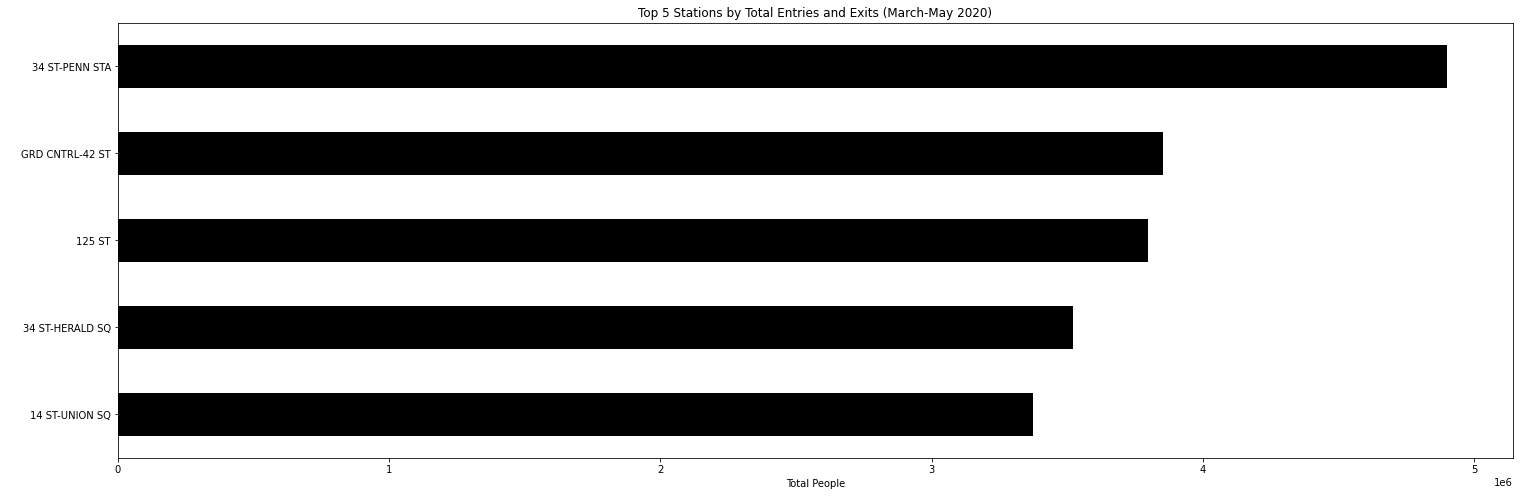

In [95]:
fig, ax = plt.subplots(figsize=(25, 8))
busy_5.head(5).sort_values(by = 'TOTAL',ascending=True).plot(kind='barh', color ='Black',ax=ax)
ax.legend().set_visible(False)
plt.title("Top 5 Stations by Total Entries and Exits (March-May 2020)")
plt.xlabel("Total People")
plt.ylabel(" ")

In [91]:
#List the busiest points groub by 'STATION' and 'datetime'. 
turnstiles_df_sorted.index = turnstiles_df_sorted['datetime']
busy_10_days_station = turnstiles_df_sorted.groupby(by=['STATION',turnstiles_df_sorted.index.day]).agg({'TOTAL': sum}).sort_values(by = 'TOTAL', ascending = False).head(10)
busy_10_days_station

TOTAL
STATION         datetime          
34 ST-PENN STA  3         336250.0
                4         335387.0
                5         330108.0
                6         328251.0
                2         327894.0
GRD CNTRL-42 ST 3         295460.0
                4         288718.0
34 ST-PENN STA  9         288307.0
GRD CNTRL-42 ST 5         281929.0
                6         280014.0

In [85]:
#Same as privois but groupby only datetime
busy_10_days = turnstiles_df_sorted.groupby(by=[turnstiles_df_sorted.index.day]).agg({'TOTAL': sum}).sort_values(by = 'TOTAL', ascending = False).head(10)
busy_10_days

,TOTAL
datetime,
4,12030219.0
5,11909729.0
3,11892413.0
6,11863542.0
2,11615983.0
9,10731435.0
10,10672819.0
11,10543383.0
12,9618677.0


In [71]:
busy_10_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TOTAL   10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


Text(0, 0.5, 'Avg. Visitors to All Stations')

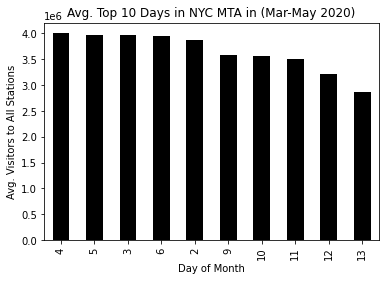

In [97]:
#Add avg. number of people use metor across nyc
busy_10_days['Avg'] =  busy_10_days['TOTAL']/3
busy_10_days.plot.bar(y='Avg', use_index=True, legend=False, color="black")
plt.title("Avg. Top 10 Days in NYC MTA in (Mar-May 2020)")
plt.xlabel("Day of Month")
plt.ylabel("Avg. Visitors to All Stations")